# A Data Story on Lyrics


In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Overview
By applying the starter code provided by the instructor, we obtain a dataset 
that contains the song name, artist, genre, lyrics and stemmed-words of over 100000 songs.

In [3]:
processed_lyrics = pd.read_csv("../output/processed_lyrics.csv")
processed_lyrics.head()

,Unnamed: 0,song,year,artist,genre,lyrics,id,stemmedwords
0,1,when-you-were-with-me,2009,a,Hip-Hop,I stopped by the house we called our home\r\nI...,1,stop house call home rundown grass overgrown s...
1,2,careless-whisper,2009,a,Hip-Hop,I feel so unsure\r\nAs I take your hand and le...,2,unsure hand lead dance floor music die eyes ca...
2,3,2-59,2007,a,Hip-Hop,Mark:] Sunday football I got boot off the pitc...,3,mark sunday football boots pitch people gamble...
3,4,power-of-desire,2007,a,Hip-Hop,[Chris:] Fallin' for a fantasy\r\nI threw away...,4,chris fallin fantasy threw destiny stop feelin...
4,5,you-re-not-in-love,2007,a,Hip-Hop,something in the way we touch\r\nyou hold my h...,5,touch hold hand hold somethings change somethi...


# Basic Data visualization
Prior to performing any analysis, we would like to do some basic EDA and data visualization. We start by taking a look at the distribution of the songs by their year of release.

# Year

From the below results we can see that the songs included in the dataset are released from 50 different years with most songs from 2006 and 2007. It is shown that 42457 and 30600 of the songs in the dataset are from the year 2006 and 2007 respectively. It is also shown two songs from the year 702 and 112 appears in the dataset so I decided to exclude them.

In [4]:
num_year = len(processed_lyrics['year'].unique())

In [5]:
year_val = processed_lyrics['year'].value_counts()

In [7]:
processed_lyrics = processed_lyrics[processed_lyrics['year'] != 702]
processed_lyrics = processed_lyrics[processed_lyrics['year'] != 112]

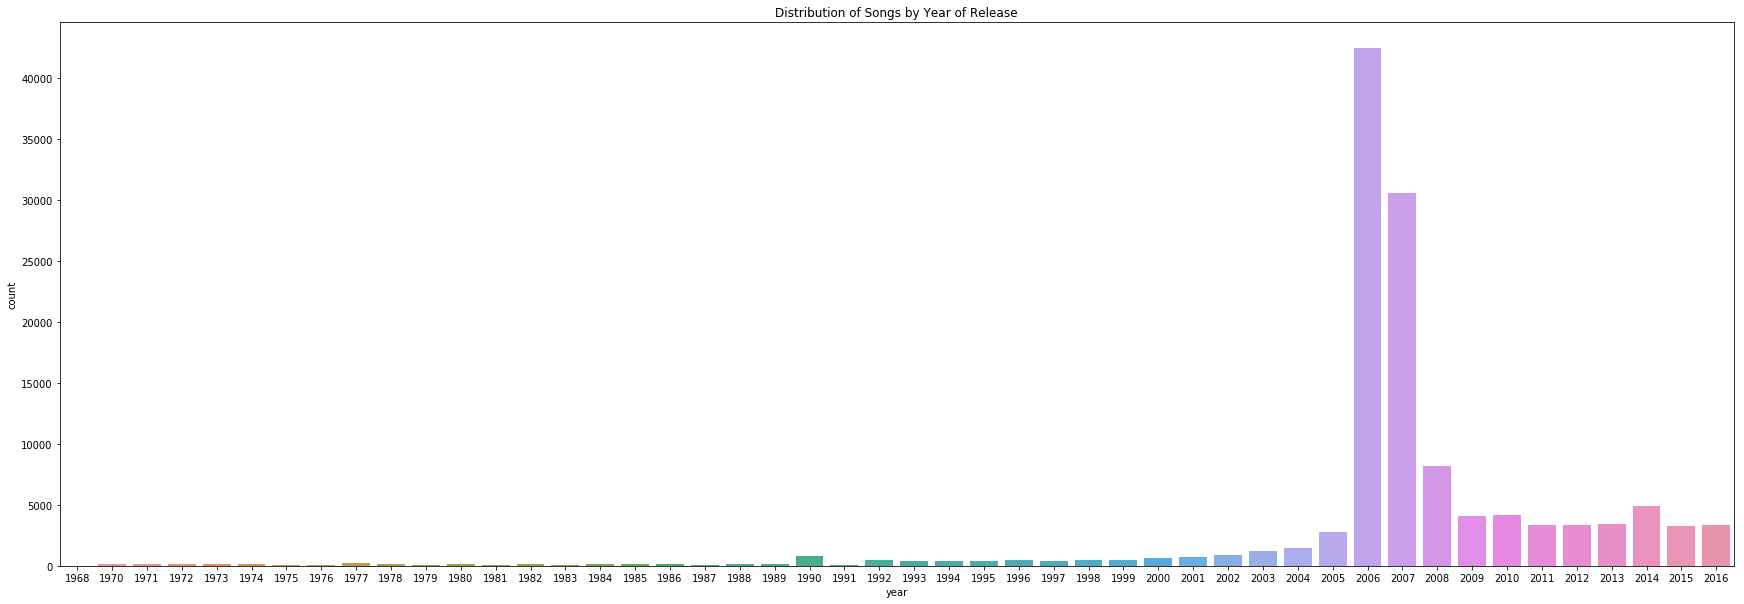

In [8]:
plt.figure(figsize=(30,10))
plt.title('Distribution of Songs by Year of Release')
sns.countplot(processed_lyrics['year'])

# Genres

Next we want to take a look at the genres of the songs. It is shown that the songs come from 12 different genres with 64845 Rock songs and 18697 Pop songs ranking first and second.

In [9]:
len(processed_lyrics['genre'].unique())

12

In [10]:
processed_lyrics['genre'].value_counts()

Rock             64845
Pop              18697
Metal            11311
Hip-Hop           8903
Country           7534
Jazz              4122
Not Available     3325
Electronic        2812
R&B               2174
Indie             1318
Folk               514
Other              147
Name: genre, dtype: int64

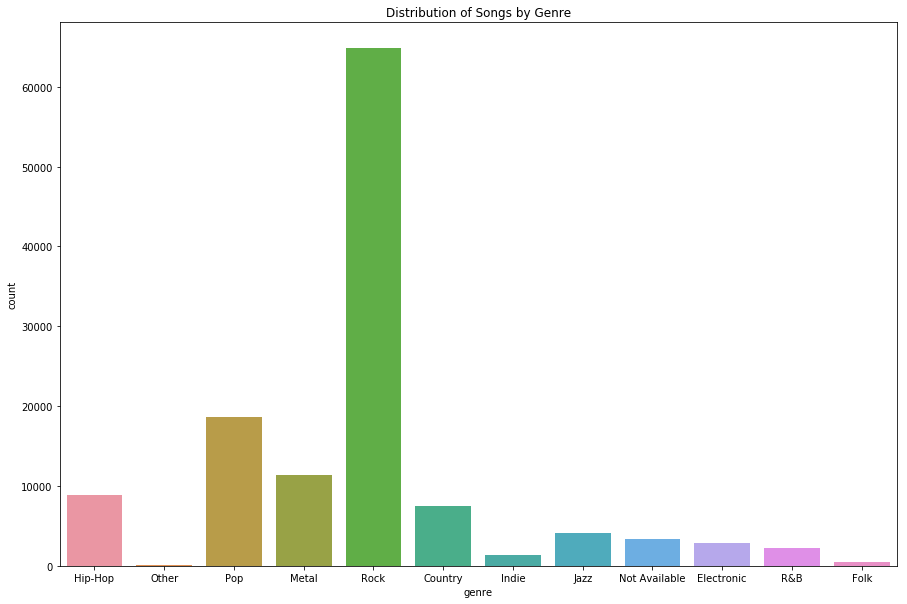

In [11]:
plt.figure(figsize=(15,10))
plt.title('Distribution of Songs by Genre')
sns.countplot(processed_lyrics['genre'])

# Song Length

Songs of different genres tend to have different lengths. Here we obtain the length of the lyrics in characters and display the boxplot of these lengths by their genres. It is clear that songs from the Hip-Hop genre have the longest lyrics. Does that mean Hip-Hop songs contain the most information?

In [12]:
processed_lyrics['song_length'] = processed_lyrics['lyrics'].apply(lambda x : len(x)) 

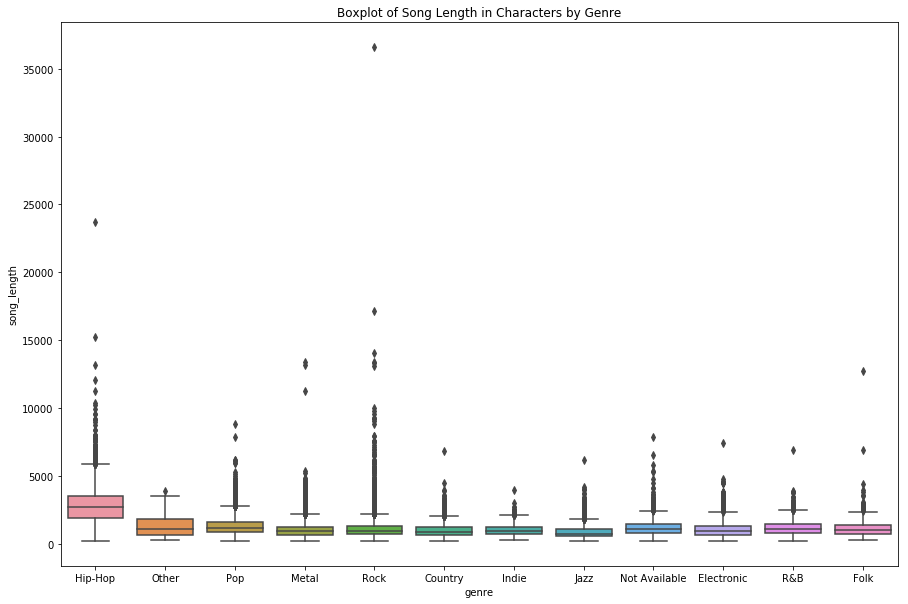

In [13]:
plt.figure(figsize=(15,10))
plt.title('Boxplot of Song Length in Characters by Genre')
sns.boxplot(x='genre', y='song_length', data=processed_lyrics[processed_lyrics['song_length'] != None])

# Topic Modelling

Being a huge Hip-Hop fan myself, I am very curious about the themes and topics depicted by rap songs. Thus I conducted topic modelling on lyrics of the Hip-Hop genre with respect to the years of their release. Both the number and percentage of songs in each topic are generated and plotted. From the tables and graphs, we are able to see how Hip-Hop song themes evolve over time.
In order to conduct topic modelling, I employed the LatentDirichletAllocation package from sklearn.decomposition and CountVectorizer from sklearn.feature_extraction
By applying the lda topic model on Hip-Hop lyrics, I am able to identify 5 topics based on 10 key-words each. Based on deep personal understanding of Hip-Hop, I assigned the following themes to each topic: 'rapper swag', 'street life', 'female', 'society' and 'party'.
The lda model returned scores on each topic for each song and we need to determine a threshold to calssifiy these topics. Here I assign the song to a topic if the score is greater than 0.1.
After the songs are assigned to different topics, both the number and percentage of songs in each topic are generated and plotted. Here we are able to see that in the 90s, the majority of Hip-Hop music are focused on society and as time goes by, more songs about partying and swag are written.

In [48]:
Hip_Hop = processed_lyrics[processed_lyrics['genre'] == 'Hip-Hop']
Hip_Hop.head()

,Unnamed: 0,song,year,artist,genre,lyrics,id,stemmedwords,song_length
0,1,when-you-were-with-me,2009,a,Hip-Hop,I stopped by the house we called our home\r\nI...,1,stop house call home rundown grass overgrown s...,522
1,2,careless-whisper,2009,a,Hip-Hop,I feel so unsure\r\nAs I take your hand and le...,2,unsure hand lead dance floor music die eyes ca...,1564
2,3,2-59,2007,a,Hip-Hop,Mark:] Sunday football I got boot off the pitc...,3,mark sunday football boots pitch people gamble...,1813
3,4,power-of-desire,2007,a,Hip-Hop,[Chris:] Fallin' for a fantasy\r\nI threw away...,4,chris fallin fantasy threw destiny stop feelin...,785
4,5,you-re-not-in-love,2007,a,Hip-Hop,something in the way we touch\r\nyou hold my h...,5,touch hold hand hold somethings change somethi...,611


In [15]:
import nltk
from nltk.corpus import stopwords
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
stop_words = stopwords.words('english')
stop_words.extend(['ill','youll','youre','ive',"shes",'hes','youve','yo','ya','em','shit','bitch','niggas','ah','gotta','chorus','niggaz','yall','verse','fucking','uh','gon','fuckin','di','dem','mi','yuh','fi','dat','whoa','nuh','motherfucker','imma','wit','check'])

In [17]:
no_features = 1000
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features = no_features, stop_words = stop_words)
tf = tf_vectorizer.fit_transform(Hip_Hop['stemmedwords'])

In [18]:
lda_model = LatentDirichletAllocation(n_topics = 5, max_iter = 10, learning_method = 'online')
lda_Z = lda_model.fit_transform(tf)

C:\Users\lyc07\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


In [19]:
for topic_num, topic in enumerate(lda_model.components_):
    message = 'Topic #{}: '.format(topic_num)
    message += " ".join([tf_vectorizer.get_feature_names()[i] for i in topic.argsort()[:-10 - 1:-1]])
    print(message)

Topic #0: rock rhyme rap hit stop move time beat black kids
Topic #1: hand dance run lord hear music people sing song air
Topic #2: girl baby love time night tonight call shake boy body
Topic #3: time life love day live world mind die stay heart
Topic #4: money ass hit hoes boy game real thug ride bout


In [49]:
topic_labels = ['rapper swag','street life','female','society','party']

In [50]:
df_topics = pd.DataFrame(lda_Z,columns = topic_labels)
df_topics.head()

,rapper swag,street life,female,society,party
0,0.009695,0.009617,0.009783,0.961212,0.009694
1,0.003056,0.470011,0.003127,0.520756,0.003050
2,0.003454,0.230236,0.226987,0.440254,0.099069
3,0.006039,0.228444,0.299467,0.460113,0.005938
4,0.006205,0.006187,0.785930,0.006264,0.195413


In [51]:
Hip_Hop = Hip_Hop.join(df_topics)

In [52]:
Hip_Hop.head()

,Unnamed: 0,song,year,artist,genre,lyrics,id,stemmedwords,song_length,rapper swag,street life,female,society,party
0,1,when-you-were-with-me,2009,a,Hip-Hop,I stopped by the house we called our home\r\nI...,1,stop house call home rundown grass overgrown s...,522,0.009695,0.009617,0.009783,0.961212,0.009694
1,2,careless-whisper,2009,a,Hip-Hop,I feel so unsure\r\nAs I take your hand and le...,2,unsure hand lead dance floor music die eyes ca...,1564,0.003056,0.470011,0.003127,0.520756,0.003050
2,3,2-59,2007,a,Hip-Hop,Mark:] Sunday football I got boot off the pitc...,3,mark sunday football boots pitch people gamble...,1813,0.003454,0.230236,0.226987,0.440254,0.099069
3,4,power-of-desire,2007,a,Hip-Hop,[Chris:] Fallin' for a fantasy\r\nI threw away...,4,chris fallin fantasy threw destiny stop feelin...,785,0.006039,0.228444,0.299467,0.460113,0.005938
4,5,you-re-not-in-love,2007,a,Hip-Hop,something in the way we touch\r\nyou hold my h...,5,touch hold hand hold somethings change somethi...,611,0.006205,0.006187,0.785930,0.006264,0.195413


In [53]:
Hip_Hop.loc[Hip_Hop['rapper swag'] >= 0.1, 'rapper swag'] = 1
Hip_Hop.loc[Hip_Hop['street life'] >= 0.1, 'street life'] = 1
Hip_Hop.loc[Hip_Hop['female'] >= 0.1, 'female'] = 1
Hip_Hop.loc[Hip_Hop['society'] >= 0.1, 'society'] = 1
Hip_Hop.loc[Hip_Hop['party'] >= 0.1, 'party'] = 1


In [54]:
Hip_Hop.loc[Hip_Hop['rapper swag'] < 0.1, 'rapper swag'] = 0
Hip_Hop.loc[Hip_Hop['street life'] < 0.1, 'street life'] = 0
Hip_Hop.loc[Hip_Hop['female'] < 0.1, 'female'] = 0
Hip_Hop.loc[Hip_Hop['society'] < 0.1, 'society'] = 0
Hip_Hop.loc[Hip_Hop['party'] < 0.1, 'party'] = 0


In [55]:
Hip_Hop.head()

,Unnamed: 0,song,year,artist,genre,lyrics,id,stemmedwords,song_length,rapper swag,street life,female,society,party
0,1,when-you-were-with-me,2009,a,Hip-Hop,I stopped by the house we called our home\r\nI...,1,stop house call home rundown grass overgrown s...,522,0.0,0.0,0.0,1.0,0.0
1,2,careless-whisper,2009,a,Hip-Hop,I feel so unsure\r\nAs I take your hand and le...,2,unsure hand lead dance floor music die eyes ca...,1564,0.0,1.0,0.0,1.0,0.0
2,3,2-59,2007,a,Hip-Hop,Mark:] Sunday football I got boot off the pitc...,3,mark sunday football boots pitch people gamble...,1813,0.0,1.0,1.0,1.0,0.0
3,4,power-of-desire,2007,a,Hip-Hop,[Chris:] Fallin' for a fantasy\r\nI threw away...,4,chris fallin fantasy threw destiny stop feelin...,785,0.0,1.0,1.0,1.0,0.0
4,5,you-re-not-in-love,2007,a,Hip-Hop,something in the way we touch\r\nyou hold my h...,5,touch hold hand hold somethings change somethi...,611,0.0,0.0,1.0,0.0,1.0


In [56]:
year_topics = Hip_Hop.groupby('year').sum().reset_index()

In [57]:
year_topics

,year,Unnamed: 0,id,song_length,rapper swag,street life,female,society,party
0,1989,285230,285252,32504,0.0,0.0,0.0,0.0,0.0
1,1992,630423,630483,47543,0.0,0.0,0.0,0.0,0.0
2,1993,750294,750366,25597,0.0,0.0,0.0,0.0,0.0
3,1994,1540446,1540568,108353,0.0,0.0,0.0,0.0,0.0
4,1995,3444257,3444580,135964,3.0,1.0,0.0,11.0,12.0
5,1996,3173795,3174074,97622,0.0,0.0,0.0,0.0,0.0
6,1997,474,474,14558,5.0,6.0,6.0,10.0,2.0
7,1998,1937109,1937293,71914,0.0,0.0,0.0,1.0,1.0
8,1999,2219424,2219607,72821,0.0,0.0,0.0,0.0,0.0
9,2000,1742965,1743118,145939,6.0,5.0,5.0,15.0,1.0


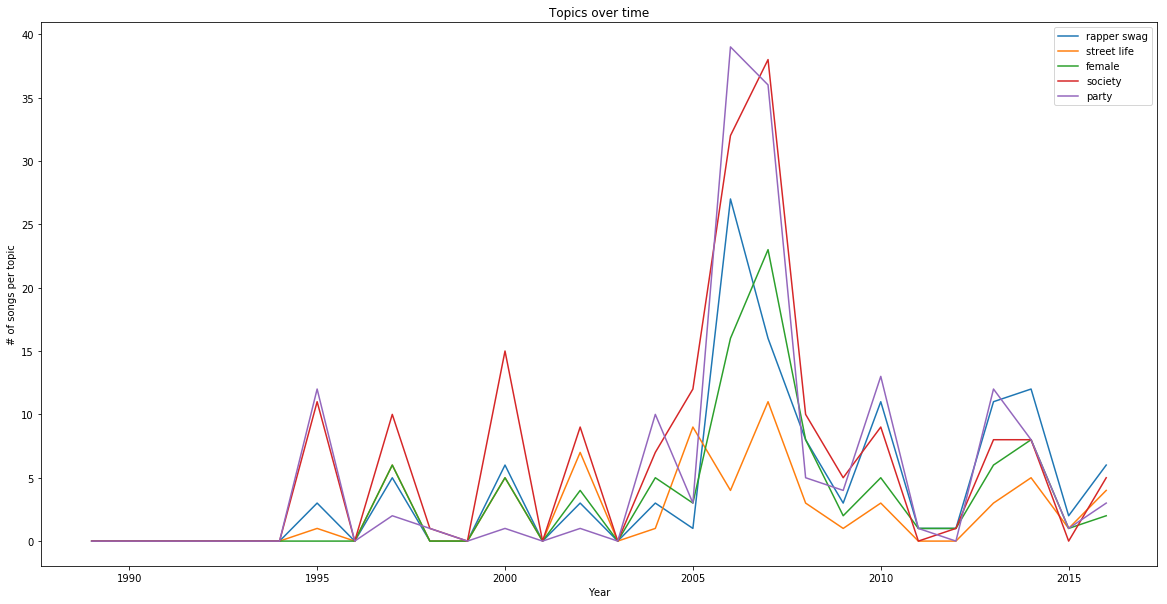

In [58]:
plt.figure(figsize = (20,10))
plt.plot(year_topics['year'], year_topics['rapper swag'], label = 'rapper swag')
plt.plot(year_topics['year'], year_topics['street life'], label = 'street life')
plt.plot(year_topics['year'], year_topics['female'], label = 'female')
plt.plot(year_topics['year'], year_topics['society'], label = 'society')
plt.plot(year_topics['year'], year_topics['party'], label = 'party')
plt.xlabel('Year')
plt.ylabel('# of songs per topic')
plt.title('Topics over time')
plt.legend()

In [59]:
counted = Hip_Hop.groupby('year').count().reset_index()['id']
year_topics['count'] = counted

In [60]:
year_topics['rapper swag'] = year_topics['rapper swag'] / year_topics['count']
year_topics['street life'] = year_topics['street life'] / year_topics['count']
year_topics['female'] = year_topics['female'] / year_topics['count']
year_topics['society'] = year_topics['society'] / year_topics['count']
year_topics['party'] = year_topics['party'] / year_topics['count']

In [61]:
year_topics

,year,Unnamed: 0,id,song_length,rapper swag,street life,female,society,party,count
0,1989,285230,285252,32504,0.000000,0.000000,0.000000,0.000000,0.000000,11
1,1992,630423,630483,47543,0.000000,0.000000,0.000000,0.000000,0.000000,30
2,1993,750294,750366,25597,0.000000,0.000000,0.000000,0.000000,0.000000,9
3,1994,1540446,1540568,108353,0.000000,0.000000,0.000000,0.000000,0.000000,40
4,1995,3444257,3444580,135964,0.054545,0.018182,0.000000,0.200000,0.218182,55
5,1996,3173795,3174074,97622,0.000000,0.000000,0.000000,0.000000,0.000000,41
6,1997,474,474,14558,0.416667,0.500000,0.500000,0.833333,0.166667,12
7,1998,1937109,1937293,71914,0.000000,0.000000,0.000000,0.040000,0.040000,25
8,1999,2219424,2219607,72821,0.000000,0.000000,0.000000,0.000000,0.000000,42
9,2000,1742965,1743118,145939,0.117647,0.098039,0.098039,0.294118,0.019608,51


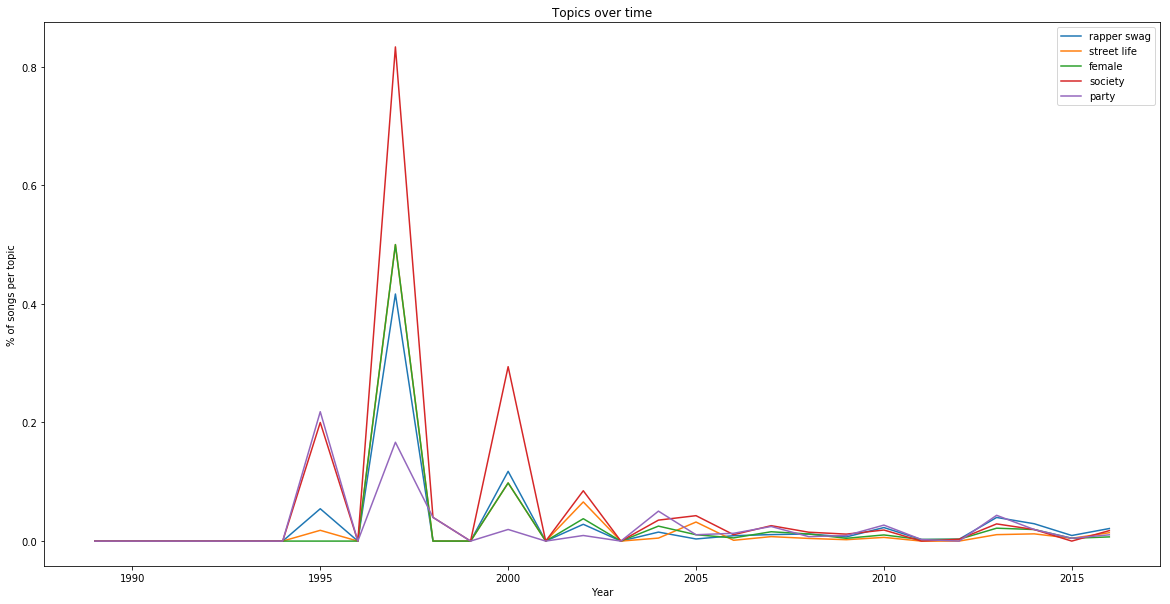

In [62]:
plt.figure(figsize = (20,10))
plt.plot(year_topics['year'], year_topics['rapper swag'], label = 'rapper swag')
plt.plot(year_topics['year'], year_topics['street life'], label = 'street life')
plt.plot(year_topics['year'], year_topics['female'], label = 'female')
plt.plot(year_topics['year'], year_topics['society'], label = 'society')
plt.plot(year_topics['year'], year_topics['party'], label = 'party')
plt.xlabel('Year')
plt.ylabel('% of songs per topic')
plt.title('Topics over time')
plt.legend()

# Word Cloud

By generating wordcloud on lyrics, we can see intuitively what are the concentrations and focuses of these lyrics. Here I employed the wordcloud package and generated wordcloud on the Hip-Hop genre to identify the most frequently used words and compared them with wordclouds of Rock and Pop genre.
However, after removing certain stop words such as certain slangs and swear words, the wordcloud of Hip-Hop music and Rock music and Pop music does not exhibit much difference.

In [36]:
from wordcloud import WordCloud

In [37]:
wc_genre = ['Hip-Hop','Rock','Pop']

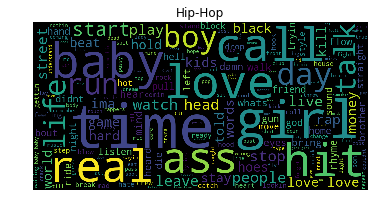

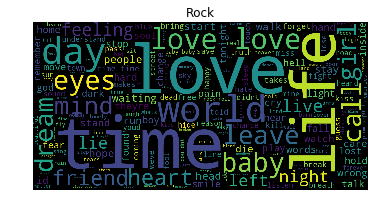

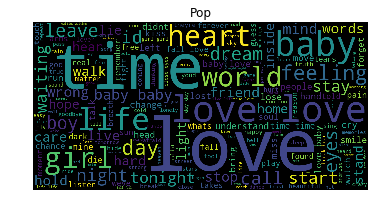

In [38]:
for genre in wc_genre:
    lyrics = processed_lyrics[processed_lyrics['genre']== genre]['stemmedwords']
    all_words = ''
    for lyric in lyrics:
        all_words += lyric
    SEED = 8
    word_cloud = WordCloud(width=1000, height=500, random_state = SEED, stopwords = stop_words).generate(all_words.lower())
    #word_cloud.to_file('wordclouds/' + artist + ".png")
    #image = word_cloud.to_image()
    
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.title(genre)
    plt.show()

# Sentiment Analysis

Lastly I am quite interested in the sentiments conveyed by songs from different genres, especially Hip-Hop music versus other genres. Therefore I conducted sentiment analysis to the lyrics. In order to do so I employed the Sentiment Vader package from the NLTK library.
The SentimentIntensityAnalyzer returned different sentiment intensity scores on each song. Here I categorize the lyrics to positive sentiment if the compound score is greater or equal to 0.5, neutral if the compound score falls between -0.5 and 0.5 and negative if the compound score is below -0.5.
Then we generate the table and plot for the sentiments.


In [39]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [40]:
genres = processed_lyrics['genre'].unique()


In [41]:
analyzer = SentimentIntensityAnalyzer()

In [42]:
sentiment_data = pd.DataFrame(columns=('genre', 'positive', 'neutral', 'negative'))

i=0

for genre in genres:
    num_positive = 0
    num_negative = 0
    num_neutral = 0

    lyrics = processed_lyrics[processed_lyrics['genre']== genre]['stemmedwords']
    for lyric in lyrics:
        #vs = analyzer.polarity_scores(sentence)
        #print("{:-<65} {}".format(sentence, str(vs)))
        comp = analyzer.polarity_scores(lyric)
        comp = comp['compound']
        if comp >= 0.5:
            num_positive += 1
        elif comp > -0.5 and comp < 0.5:
            num_neutral += 1
        else:
            num_negative += 1
            
    num_total = num_negative + num_neutral + num_positive
    percent_negative = (num_negative / float(num_total)) * 100
    percent_neutral = (num_neutral / float(num_total)) * 100
    percent_positive = (num_positive / float(num_total)) * 100
    sentiment_data.loc[i] = (genre, percent_positive, percent_neutral, percent_negative)
    i+=1


Based on the graph and table below, it is clear that most songs in the Hip-Hop genre conveys negativity. In fact, around 65% of Hip-Hop lyrics are categorized as negative, 27% are positive and 7.2% netural. However, there is one genre with a higher portion of negative lyrics and that is Metal with 69.4%. 

<Figure size 2160x1080 with 0 Axes>

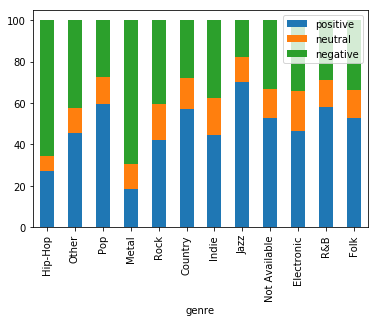

In [43]:
plt.figure(figsize=(30,15))
sentiment_data.plot.bar(x = 'genre', stacked=True)
plt.show()

In [44]:
sentiment_data

,genre,positive,neutral,negative
0,Hip-Hop,27.159384,7.222285,65.618331
1,Other,45.578231,12.244898,42.176871
2,Pop,59.501524,13.130449,27.368027
3,Metal,18.627884,11.970648,69.401468
4,Rock,42.134320,17.225692,40.639988
5,Country,57.366605,14.773029,27.860366
6,Indie,44.385432,17.905918,37.708649
7,Jazz,69.941776,12.518195,17.540029
8,Not Available,52.992481,13.804511,33.203008
9,Electronic,46.728307,19.238976,34.032717


# Summary
- Songs from different genres have different lenghts in their lyrics. Hip-Hop music tend to have the longest lyrics.

- The theme of Hip-Hop music changes with respect to time. In the 90s, the dominant theme was about society whereas at present more songs about partying are written.

- Hip-Hop music tend to contain negative sentiments. Listening to Hip-Hop music could be a good way to lash out negative emotions.